In [1]:
#importing necessery libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns


In [2]:
#reading dataset
df=pd.read_csv('/Users/bibekrai/tensorflow-test/Quora/train.csv')
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


## Basic EDA


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [4]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], dtype='object')

In [5]:
df.describe()

,id,qid1,qid2,is_duplicate
count,404290.000000,404290.000000,404290.000000,404290.000000
mean,202144.500000,217243.942418,220955.655337,0.369198
std,116708.614503,157751.700002,159903.182629,0.482588
min,0.000000,1.000000,2.000000,0.000000
25%,101072.250000,74437.500000,74727.000000,0.000000
50%,202144.500000,192182.000000,197052.000000,0.000000
75%,303216.750000,346573.500000,354692.500000,1.000000
max,404289.000000,537932.000000,537933.000000,1.000000


In [6]:
df.value_counts()

id      qid1    qid2    question1                                                                              question2                                                                                                                                           is_duplicate
0       1       2       What is the step by step guide to invest in share market in india?                     What is the step by step guide to invest in share market?                                                                                           0               1
269534  387254  387255  What is a good book about design?                                                      What are the best books about designing for emotion?                                                                                                0               1
269532  387250  387251  Is "A Head Full of Dreams" going to be Coldplay's last album?                          What is the song "A head full of dreams" by Coldplay about?    

In [7]:
df.dtypes

id               int64
qid1             int64
qid2             int64
question1       object
question2       object
is_duplicate     int64
dtype: object

In [8]:
df.shape

(404290, 6)

In [9]:
df['is_duplicate'].value_counts()

0    255027
1    149263
Name: is_duplicate, dtype: int64

In [10]:
len(df)

404290

In [11]:
(df['is_duplicate'].value_counts()/len(df))*100

0    63.080215
1    36.919785
Name: is_duplicate, dtype: float64

## Findings unique questions in dataset

In [12]:
l1=df['qid1'].tolist()

In [13]:
l2=df['qid2'].tolist()

In [14]:
len(l1+l2)

808580

In [15]:
qids=pd.Series(l1+l2)
qids

0              1
1              3
2              5
3              7
4              9
           ...  
808575    379845
808576    155606
808577    537929
808578    537931
808579    537933
Length: 808580, dtype: int64

In [16]:
np.unique(qids)

array([     1,      2,      3, ..., 537931, 537932, 537933])

In [17]:
unique_qs=len(np.unique(qids))
unique_qs

537933

**Observation**\
537933 unique questions are present in the dataset.

## Finding number of unique question that appear more than one time

In [18]:
qids.value_counts()

2559      157
30782     120
4044      111
2561       88
14376      79
         ... 
416446      1
416444      1
416441      1
416439      1
537933      1
Length: 537933, dtype: int64

In [19]:
unique_question_appeared_morethen1time=np.sum(qids.value_counts()>1)
unique_question_appeared_morethen1time

111780

In [20]:
unique_question_appeared_morethen1time_occuranceprobability=(unique_question_appeared_morethen1time/unique_qs)*100
unique_question_appeared_morethen1time_occuranceprobability

20.77953945937505

**Observation**\
\
111780 unique question is appeared more than 1 time and the apperanance probabilty is 20%.

## Max number of time single question is repeated.

In [21]:
qids.value_counts()

2559      157
30782     120
4044      111
2561       88
14376      79
         ... 
416446      1
416444      1
416441      1
416439      1
537933      1
Length: 537933, dtype: int64

In [22]:
qids.value_counts().max()

157

**Observation**\
\
Question with id 2559 is reapeated 157 times which is highest number of times any unique question is repeated

## Data Visualization

**Plot Repeated and unique questions**

<BarContainer object of 2 artists>

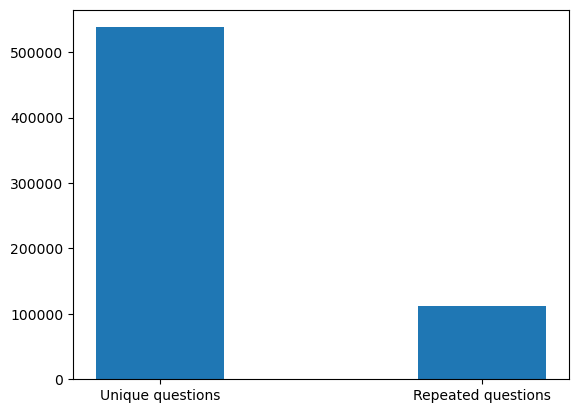

In [23]:
x=['Unique questions','Repeated questions']
y=[unique_qs,unique_question_appeared_morethen1time]
plt.bar(x,y,width=0.4)

## Checking for Duplicates

In [24]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], dtype='object')

In [25]:
pair_duplicates=df[['qid1','qid2','is_duplicate']].groupby(['qid1','qid2']).count()
pair_duplicates

is_duplicate
qid1   qid2                
1      2                  1
3      4                  1
       282170             1
       380197             1
       488853             1
...                     ...
537924 537925             1
537926 537927             1
537928 537929             1
537930 537931             1
537932 537933             1

[404290 rows x 1 columns]

**No of occurence of questions**

Text(0, 0.5, 'No of questions')

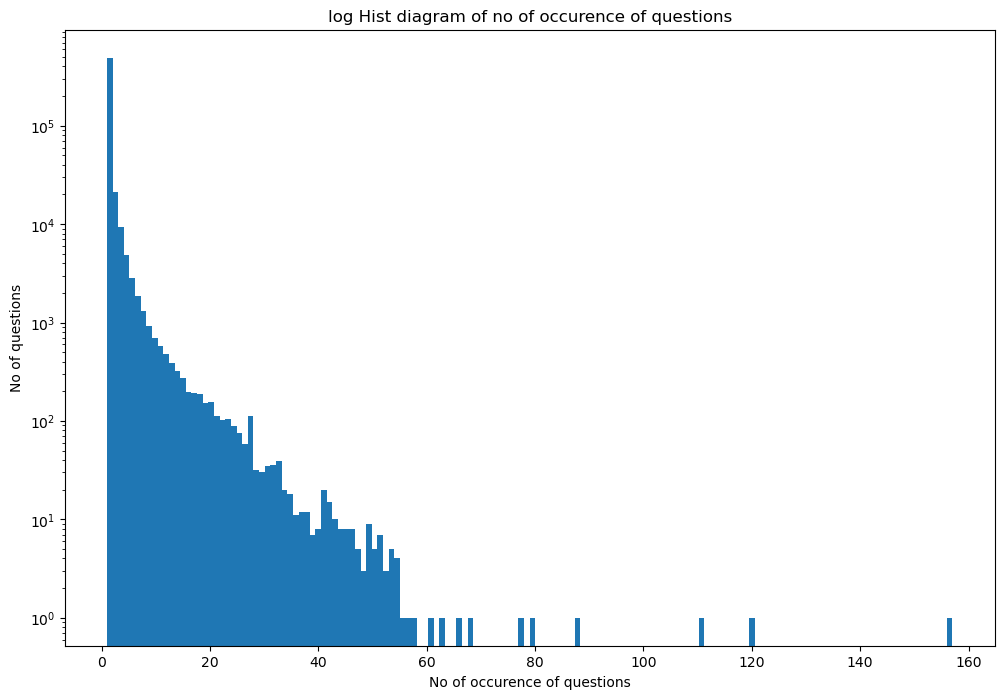

In [26]:
plt.figure(figsize=(12,8))
plt.hist(qids.value_counts(),bins=150)
plt.yscale('log')
plt.title('log Hist diagram of no of occurence of questions')
plt.xlabel('No of occurence of questions')
plt.ylabel('No of questions')

**Checking for missing values in data**

In [27]:
df.isnull().any().sum()

2

In [28]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [29]:
df.fillna('',inplace=True)

In [30]:
df.isnull().any().sum()

0

In [31]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [32]:
train_qs=pd.Series(list(df['question1'])+list(df['question2']))
train_qs

0         What is the step by step guide to invest in sh...
1         What is the story of Kohinoor (Koh-i-Noor) Dia...
2         How can I increase the speed of my internet co...
3         Why am I mentally very lonely? How can I solve...
4         Which one dissolve in water quikly sugar, salt...
                                ...                        
808575    How many keywords are there in PERL Programmin...
808576           Is it true that there is life after death?
808577                                    What's this coin?
808578    I am having little hairfall problem but I want...
808579        What is it like to have sex with your cousin?
Length: 808580, dtype: object

## Text Analysis

In [33]:
train_data=" ".join(train_qs)

In [34]:
len(train_data)

49179886

In [35]:
!pip install wordcloud


In [36]:
from wordcloud import WordCloud

(-0.5, 999.5, 999.5, -0.5)

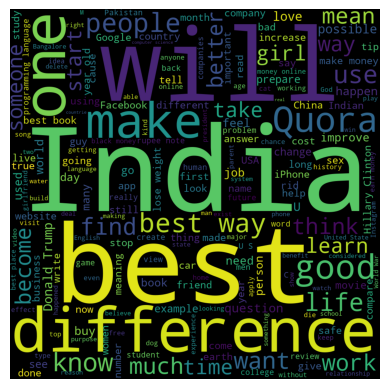

In [37]:
cloud=WordCloud(width=1000,height=1000).generate(train_data)
plt.imshow(cloud)
plt.axis('off')

In [38]:
train_qs

0         What is the step by step guide to invest in sh...
1         What is the story of Kohinoor (Koh-i-Noor) Dia...
2         How can I increase the speed of my internet co...
3         Why am I mentally very lonely? How can I solve...
4         Which one dissolve in water quikly sugar, salt...
                                ...                        
808575    How many keywords are there in PERL Programmin...
808576           Is it true that there is life after death?
808577                                    What's this coin?
808578    I am having little hairfall problem but I want...
808579        What is it like to have sex with your cousin?
Length: 808580, dtype: object

In [39]:
train_qs[0]

'What is the step by step guide to invest in share market in india?'

In [40]:
def find_semantics(x,symbol):
    return symbol in x

In [41]:
find_semantics(train_qs[0],'?')

True

In [42]:
find_semantics(train_qs[5],'?')

True

In [43]:
train_qs.apply(find_semantics,args='?')

0         True
1         True
2         True
3         True
4         True
          ... 
808575    True
808576    True
808577    True
808578    True
808579    True
Length: 808580, dtype: bool

In [44]:
np.mean(train_qs.apply(find_semantics,args='?'))*100

99.87385292735412

## Frequency of questions id

In [45]:
data=df.copy()

In [46]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [47]:
df['qid1']

0              1
1              3
2              5
3              7
4              9
           ...  
404285    433578
404286     18840
404287    537928
404288    537930
404289    537932
Name: qid1, Length: 404290, dtype: int64

In [48]:
data['freq_id1']=data.groupby('qid1')['qid1'].transform('count')
data['freq_id1']

0          1
1          4
2          1
3          1
4          3
          ..
404285     2
404286    12
404287     1
404288     1
404289     1
Name: freq_id1, Length: 404290, dtype: int64

In [49]:
df['freq_id1']=df.groupby('qid1')['qid1'].transform('count')
df['freq_id1']

0          1
1          4
2          1
3          1
4          3
          ..
404285     2
404286    12
404287     1
404288     1
404289     1
Name: freq_id1, Length: 404290, dtype: int64

In [50]:
data['qid2']

0              2
1              4
2              6
3              8
4             10
           ...  
404285    379845
404286    155606
404287    537929
404288    537931
404289    537933
Name: qid2, Length: 404290, dtype: int64

In [51]:
data['freq_id2']=data.groupby('qid2')['qid2'].transform('count')
data['freq_id2']

0         1
1         1
2         1
3         1
4         1
         ..
404285    2
404286    1
404287    1
404288    1
404289    1
Name: freq_id2, Length: 404290, dtype: int64

In [52]:
data

,id,qid1,qid2,question1,question2,is_duplicate,freq_id1,freq_id2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1
...,...,...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0,2,2
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1,12,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0,1,1
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0,1,1


In [53]:
df['question1'].str.len()

0         66
1         51
2         73
3         50
4         76
          ..
404285    85
404286    41
404287    17
404288    94
404289    37
Name: question1, Length: 404290, dtype: int64

In [54]:
df['question1'][5]

'Astrology: I am a Capricorn Sun Cap moon and cap rising...what does that say about me?'

In [55]:
len(df['question1'][5])

86

In [56]:
df['question1'][5].split(' ')

['Astrology:',
 'I',
 'am',
 'a',
 'Capricorn',
 'Sun',
 'Cap',
 'moon',
 'and',
 'cap',
 'rising...what',
 'does',
 'that',
 'say',
 'about',
 'me?']

In [57]:
len(df['question1'][5].split(' '))

16

In [58]:
def word_counts(text):
    return len(text.split(' '))

In [59]:
df['q1_total_word']=df['question1'].apply(word_counts)

In [60]:
df['q2_total_word']=df['question2'].apply(word_counts)

In [61]:
df

,id,qid1,qid2,question1,question2,is_duplicate,freq_id1,q1_total_word,q2_total_word
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,14,12
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,8,13
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,14,10
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,11,9
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,13,7
...,...,...,...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0,2,14,13
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1,12,8,9
404287,404287,537928,537929,What is one coin?,What's this coin?,0,1,4,3
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0,1,17,25


In [62]:
pwd

'/Users/bibekrai/tensorflow-test/Quora-Analysis'

In [63]:
df.to_csv('/Users/bibekrai/tensorflow-test/Quora/feature_data_extraction.csv')

In [64]:
print('Minimum number of length in question1 is : {} .'.format(df['q1_total_word'].min()))

Minimum number of length in question1 is : 1 .


In [65]:
print('Minimum number of length in question2 is : {} .'.format(df['q2_total_word'].min()))

Minimum number of length in question2 is : 1 .


In [66]:
print('Maximum number of length in question1 is : {} .'.format(df['q1_total_word'].max()))

Maximum number of length in question1 is : 125 .


In [67]:
print('Maximum number of length in question2 is : {} .'.format(df['q2_total_word'].max()))

Maximum number of length in question2 is : 237 .


In [68]:
df['q1_q2_total_word']=df['q1_total_word']+df['q2_total_word']

In [69]:
df['q1_q2_total_word']

0         26
1         21
2         24
3         20
4         20
          ..
404285    27
404286    17
404287     7
404288    42
404289    18
Name: q1_q2_total_word, Length: 404290, dtype: int64

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 4.0000e+00, 5.0000e+00,
        0.0000e+00, 1.2000e+01, 7.5200e+02, 1.6490e+03, 3.1180e+03,
        4.6240e+03, 0.0000e+00, 6.8520e+03, 9.2600e+03, 1.3912e+04,
        1.6210e+04, 2.1732e+04, 0.0000e+00, 2.2229e+04, 2.5740e+04,
        2.4192e+04, 2.5540e+04, 2.2488e+04, 0.0000e+00, 2.1977e+04,
        1.8321e+04, 1.7300e+04, 1.4520e+04, 1.3537e+04, 0.0000e+00,
        1.1434e+04, 1.0457e+04, 9.0180e+03, 9.3970e+03, 7.6040e+03,
        0.0000e+00, 7.6560e+03, 5.9960e+03, 6.1350e+03, 4.9130e+03,
        5.1460e+03, 0.0000e+00, 3.9620e+03, 4.0380e+03, 3.2970e+03,
        3.5210e+03, 2.7070e+03, 0.0000e+00, 2.7490e+03, 2.1850e+03,
        2.4900e+03, 1.8880e+03, 1.9420e+03, 0.0000e+00, 1.3850e+03,
        1.2380e+03, 1.1300e+03, 9.9000e+02, 8.9500e+02, 0.0000e+00,
        8.4700e+02, 6.9400e+02, 7.1500e+02, 5.5400e+02, 4.8700e+02,
        0.0000e+00, 4.6200e+02, 3.8800e+02, 3.6200e+02, 3.6000e+02,
        2.8900e+02, 0.0000e+00, 2.5400e+02, 2.60

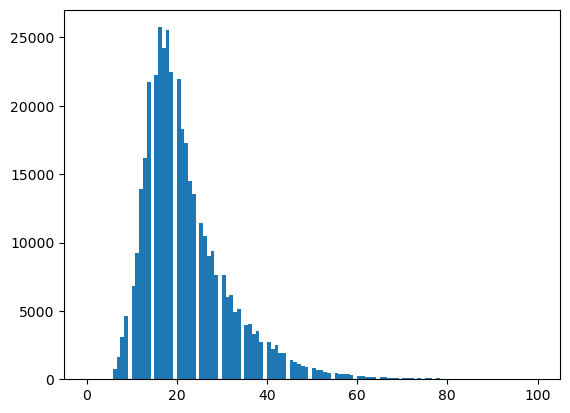

In [70]:
plt.hist(df['q1_q2_total_word'],range=[0,100],bins=120)

In [71]:
data[data['question1'].str.contains('₹')].index

Int64Index([  4262,   4303,   4499,   5064,   5367,   7024,   7337,   9576,
              9822,  10446,
            ...
            380914, 383453, 386713, 389044, 390332, 393029, 394728, 395644,
            395668, 396172],
           dtype='int64', length=309)

In [72]:
data['question1'][4262]

'How will demonetization of \u200e₹1000 and \u200e₹500 notes will help curb the rampant black currency in India?'

In [73]:
data['question1'][4262].replace('₹','ruppes')

'How will demonetization of \u200eruppes1000 and \u200eruppes500 notes will help curb the rampant black currency in India?'

In [74]:
data['question1'][1]

'What is the story of Kohinoor (Koh-i-Noor) Diamond?'

In [75]:
data['question1'].str.strip()
data['question1']

0         What is the step by step guide to invest in sh...
1         What is the story of Kohinoor (Koh-i-Noor) Dia...
2         How can I increase the speed of my internet co...
3         Why am I mentally very lonely? How can I solve...
4         Which one dissolve in water quikly sugar, salt...
                                ...                        
404285    How many keywords are there in the Racket prog...
404286            Do you believe there is life after death?
404287                                    What is one coin?
404288    What is the approx annual cost of living while...
404289                What is like to have sex with cousin?
Name: question1, Length: 404290, dtype: object

In [76]:
data['question1'][1]

'What is the story of Kohinoor (Koh-i-Noor) Diamond?'

In [77]:
#string matching using fuzzywuzzy

In [78]:
pip install fuzzywuzzy

Note: you may need to restart the kernel to use updated packages.


In [79]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [80]:
data['question1'][0]

'What is the step by step guide to invest in share market in india?'

In [81]:
data['question2'][0]

'What is the step by step guide to invest in share market?'

In [82]:
fuzz.ratio(data['question1'][0],data['question2'][0])

93

**Above observation**\
we found out the string matching ratio between two string is 93.


In [83]:
def fuzz_ratio(row):
    return fuzz.ratio(row['question1'],row['question2'])

In [84]:
data['fuzz ratio']=data.apply(fuzz_ratio,axis=1)

In [85]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_id1,freq_id2,fuzz ratio
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,93
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,65
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,45
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,7
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,37


In [86]:
fuzz.partial_ratio(data['question1'][0],data['question2'][0])

98

In [93]:
fuzz.token_sort_ratio(data['question1'][0],data['question2'][0])

93

In [94]:
fuzz.partial_ratio('Nepal vs America','America vs Nepal')

44

In [96]:
fuzz.token_sort_ratio('Nepal vs America','America vs Nepal')

100